<a href="https://colab.research.google.com/github/mironafanasenko/pogect/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%B8%D1%80%D0%BE%D0%BD_%D0%90%D1%84%D0%B0%D0%BD%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE_task28_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Занятие 28. Кластеризация. Решение задач.



Теоретический материал с описанием алгоритмов и задач кластеризации размещён в презентации к занятию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Использование метрик для выявления **похожих** объектов и заполнения пропущенных данных

На прошлом занятии мы разобрали алгоритм заполнения пропущенных данных на основе различных метрик. 

In [ ]:
df = pd.read_csv("imdb.csv")

Заменим пропуски на `np.nan`.

In [ ]:
df = df.replace('-', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12338 entries, 0 to 12337
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    12338 non-null  object 
 1   RATING  12338 non-null  float64
 2   VOTES   12338 non-null  int64  
 3   GENRE   12338 non-null  object 
 4   YEAR    12338 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 482.1+ KB


In [ ]:
col = ['Date', 'Raiting',]

In [ ]:
enc = OrdinalEncoder()

In [ ]:
T = np.array([['NAME', 'RATING'],
              ['VOTES', 'YEAR']])

In [ ]:
enc.fit(T)

OrdinalEncoder()

In [ ]:
enc.transform(T)

array([[0., 0.],
       [1., 1.]])

In [ ]:
df.head()

,NAME,RATING,VOTES,GENRE,YEAR
0,отверженные 25ая годовщина мюзикла,8.8,4660,"Drama, Music, Musical",2010
1,начало,8.8,1858608,"Action, Adventure, Sci-Fi",2010
2,душа и персона,8.6,2856,"Action, Crime, Thriller",2010
3,плохой герой,8.4,1200,"Comedy, Crime, Drama",2010
4,жизненный путь,8.4,2113,"Action, Drama",2010


In [ ]:
df["RATING"]

0        8.8
1        8.8
2        8.6
3        8.4
4        8.4
        ... 
12333    1.7
12334    1.7
12335    1.2
12336    1.2
12337    1.0
Name: RATING, Length: 12338, dtype: float64

In [ ]:
a = df["RATING"]
b = df["VOTES"]

In [ ]:
x = a
y = b

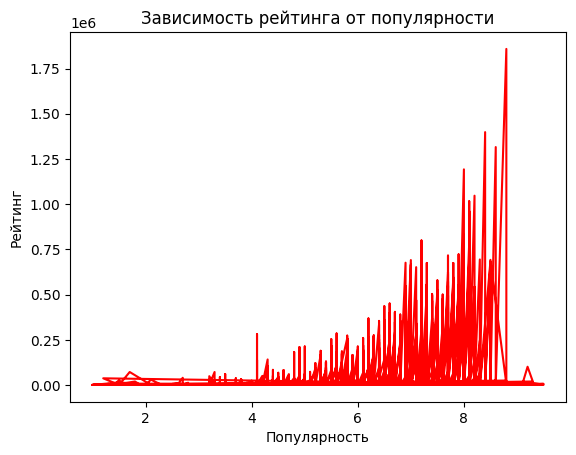

In [ ]:
plt.title("Зависимость рейтинга от популярности")
plt.xlabel("Популярность")
plt.ylabel("Рейтинг")
plt.plot(x, y, color ="red")
plt.show()

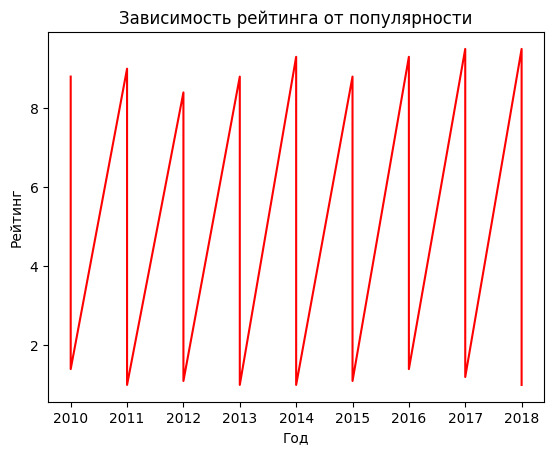

In [ ]:
a = df["RATING"]
b = df["YEAR"]
x = a
y = b
plt.title("Зависимость рейтинга от популярности")
plt.xlabel("Год")
plt.ylabel("Рейтинг")
plt.plot(y, x, color ="red")
plt.show()

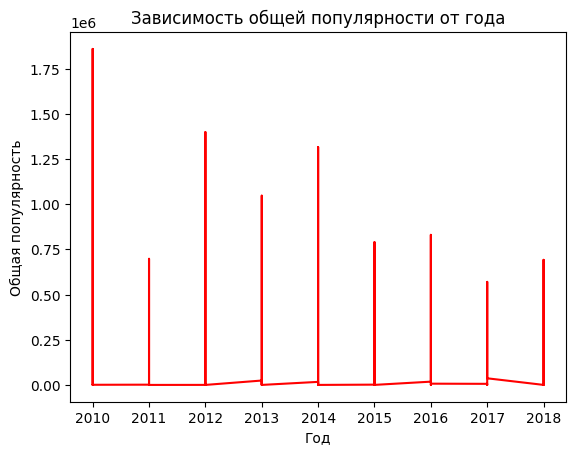

In [ ]:
a = df["VOTES"]
b = df["YEAR"]
x = a
y = b
plt.title("Зависимость общей популярности от года")
plt.xlabel("Год")
plt.ylabel("Общая популярность")
plt.plot(y, x, color ="red")
plt.show()

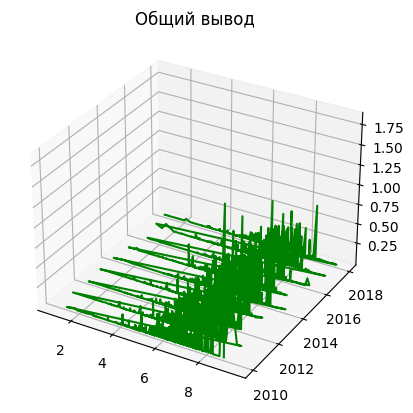

In [ ]:
X = df["YEAR"]
Y = df["VOTES"]
Z = df["RATING"]

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot3D(Z, X, Y, 'green')
ax.set_title('Общий вывод')
plt.show()

In [ ]:
a = df["YEAR"]

In [ ]:
a

0        2010
1        2010
2        2010
3        2010
4        2010
         ... 
12333    2018
12334    2018
12335    2018
12336    2018
12337    2018
Name: YEAR, Length: 12338, dtype: int64

2010

##Масштабирование данных

Мы использовали собственные функции для нормализации (масштабирования) данных. Теперь используем классы, объявленные в `sklearn.preprocessing`.

###StandardScaler() 

In [ ]:
A = np.array([[10, 100, 1], 
              [50, 950, 0.5], 
              [99, 290, 0.2]])

In [ ]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)


In [ ]:
A_scaled

array([[-1.18144947, -0.95168847,  1.31319831],
       [-0.08242671,  1.38177845, -0.20203051],
       [ 1.26387618, -0.43008998, -1.1111678 ]])

###MinMaxScaler()

In [ ]:
scaler = MinMaxScaler()
A_scaled = scaler.fit_transform(A)

In [ ]:
A_scaled

array([[0.        , 0.        , 1.        ],
       [0.4494382 , 1.        , 0.375     ],
       [1.        , 0.22352941, 0.        ]])

Используем штатную нормализацию данных - MinMaxScaler() для набора данных с рейтингом ВУЗов. 

In [ ]:
X = df.values

In [ ]:
X

array([[89.0, 1, '2', '1', '1', '1'],
       [89.0, 2, '1', '10', '2', '5'],
       [89.0, 3, '9', '3', '3', '2'],
       ...,
       [34.0, 68, '505', '1035', nan, '1942'],
       [88.0, 61, nan, nan, nan, '1933'],
       [62.0, 11, nan, nan, nan, '1934']], dtype=object)

In [ ]:
X.shape

(2000, 6)

In [ ]:
X_minmax = scaler.fit_transform(X)

In [ ]:
X_minmax

array([[1.        , 1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.48505492, 0.40545584, 1.        ],
       [0.33333333, 0.5       , 0.3535818 , 0.56259573]])

Удалим пропущенные значения.

In [ ]:
X_withoutnan = fill_nan(X_minmax)

In [ ]:
x = X_withoutnan

Разобьем выборки на тренировочную и тестовую. 

In [ ]:
x_train,x_test, y_train, y_test = \
train_test_split(x,y,test_size= 0.3, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Построим модель линейной регрессии.

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Посмотрим характеристики модели.

In [ ]:
print_LR_MSE_score(model, x_test,y_test)

w = [  0.38842205  -0.72981105   0.23062408  -2.36744743   2.863757
 -14.34066222] 
MSE = 3.7087553213307776 
Score = 0.8394667008516299


Попробуем другой вариант нормализации

In [ ]:
scaler = StandardScaler()


Есть улучшение показателей.  Но имеет смысл попробовать заполнить пропущенные значения другим алгоритмом. 

##Задание 28.1*  
Попробуйте поэкспериментировать - удалить  из набора данных с рейтингом ВУЗов столбцы, в которых изначально больше 40% значений пропущены. Заполните пропущенные значения в остальных столбцах. Постройте похожим способом модель линейной  регрессии и сравните показатели полученной модели. Они улучшились?


##*Использование коэффициента корреляции для восстановления пропущенных данных*


Коэффициент корреляции показывает, как сильно значения одного признака влияют на значения других признаков, фактически он показывает некоторую меру близости признаков.


### Использование корреляции столбцов
**Алгоритм 27.2**

Пусть $X$ - матрица нецелевых признаков, содержащая $n$ строк (по числу объектов) и $m$ столбцов (по числу признаков). 

И пусть признак $x_{ij}$ не определен. Это соответствует тому, что для объекта $i$ значение признака $j$ либо пропущено, либо равно nan. 

Тогда, зная корреляцию столбца $j$ с остальными признаками (столбцами), можно заполнить (восстановить) значение $x_{ij}$ по следующей формуле.

$$
x_{ij}  = \overline{x_j} + \frac{\displaystyle\sum_{k=1}^{m} {corr(x_k,x_j)(x_{ik} - \overline{x_k})}}
{\displaystyle\sum_{k=1}^{m} {|corr(x_k,x_j)|}},    k\neq j
$$

где 
$ \overline{x_j}$ - среднее значение признака  $j$,  
$ \overline{x_k}$ - среднее значение признака  $k$,  
$ corr(x_k,x_j) $ - коэффициент корреляции между $k$-ым и $j$-тым признаками.  

### Использование корреляции строк 

Корреляция столбцов демонстировала нам близость признаков, а что будет показывать для той же матрицы корреляция строк?  



Сначала посмотрим на матрицу. Дает ли нам какую-то информацию столбец, если все его значения для всех объектов одинаковы? 


Дает ли нам какую-то информацию строка, если все её значения одинаковы?

И можно ли для таких матриц искать корреляции столбцов и строк?  

Рассмотрим примеры. 


In [ ]:
X = np.array([[4., 3., 5., 4], 
              [5., 4., 6., 5], 
              [5., 5., 4., 5], 
              [5., 4., 5., 5.]])

In [ ]:
np.isin(0, X.var(axis = 1))

array(False)

In [ ]:
# Определить, что есть строка с одинаковыми значениями
if np.isin(0, X.var(axis = 0)):
  print('Построение матрицы не возможно')
else: M = np.corrcoef(X)

In [ ]:
M

array([[ 1.        ,  1.        , -0.81649658,  0.81649658],
       [ 1.        ,  1.        , -0.81649658,  0.81649658],
       [-0.81649658, -0.81649658,  1.        , -0.33333333],
       [ 0.81649658,  0.81649658, -0.33333333,  1.        ]])

In [ ]:
df = pd.DataFrame(x)

In [ ]:
df.corr()        # вычисляет коэффициенты корреляции по строкам, и не работает,
                # если есть строка с одинаковыми значениями

,0,1,2,3
0,1.000000,0.014234,0.147514,-0.839588
1,0.014234,1.000000,0.985351,-0.512886
2,0.147514,0.985351,1.000000,-0.594210
3,-0.839588,-0.512886,-0.594210,1.000000


Вспомним, как интерпретировать показатели корреляции. В нашей матрице `X` нулевая и первая строки коррелируют.  

In [ ]:
X = np.array([[4., 3., 5., 5], 
              [5., 4., 6., 5], 
              [5., 4., 5., 5], 
              [5., 4., 5., 5.]])

np.corrcoef(X) # вычисляет коэффициенты корреляции по строкам

In [ ]:
# Определить, что есть столбец с одинаковыми значениями


In [ ]:
df = pd.DataFrame(X)

In [ ]:
df.corr()     # вычисляет коэффициенты корреляции по столбцам, и не работает, 
              # если есть столбец с одинаковыми значениями 

Соответственно, функция `df.corr()` тоже не умеет работать в условии, когда все значения какого-то признака **одинаковы**.
А нужен ли нам вообще такой признак?

###Вывод
До применения Алгоритма 27.2 следует убедиться, что матрица удовлетворяет требованиям. В зависимости от применяемой функции  или метода  в матрице не должно быть:   
Для `corrcoef(X)`  - строк, все значения которой равны между собой.  
Для `corr()` - столбцов, все значения которого равны между собой.

#Кластеризация

Кластеризация (англ. cluster analysis) — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

Прежде, чем писать собственный алгоритм кластеризации, давайте напишем несколько функций для визуализации этого процесса.   

Пусть у нас есть 4 объекта с признаками, см. матрицу `X.`

In [ ]:
X = np.array([[1., 1.], 
              [2., 0], 
              [1., 6.], 
              [4., 0.]])

Посмотрим, как они разбросаны. 

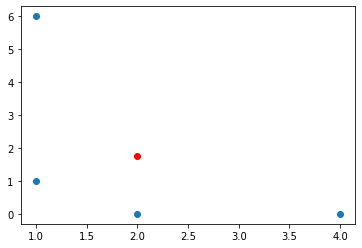

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(X[:, 0].mean(), X[:, 1].mean(), 'ro');

##Задание 28.1  
Напишите функцию `draw_circle(center, R)`, которая рисует в плоскости окружность с центром в точке `center`   радиуса `R`. Кортеж `center` содержит два числа - координаты центра `(x, y)`.

In [ ]:
def draw_circle(center, R):
    plt.figure(figsize = (4,4))
    angle = np.linspace(0,2*np.pi,100)
    plt.plot(center[0]+R*np.cos(angle),center[1]+R*np.sin(angle), 'r')
    return 0

0

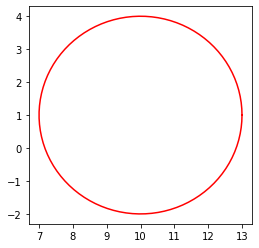

In [ ]:
draw_circle((10,1), 3)

##Задание 28.2  
Напишите функцию `find_centroid(X, c)`, которая возвращает центр тяжести (центроид) для объектов массива `X`, перечисленных в списке c. C - список индексов строк.  

In [ ]:
def find_centroid(X, c):
    """ 
    """
    return X[c].mean(axis = 0)

In [ ]:
find_centroid(X, [0, 1,2])

array([1.33333333, 2.33333333])

In [ ]:
X

array([[1., 1.],
       [2., 0.],
       [1., 6.],
       [4., 0.]])

***Курсив:***## Алгоритм нахождения одного кластера для FOREL

In [ ]:
def find_cluster(X, R, f):

    return c

In [ ]:
X = np.array([[1., 1.], 
              [2., 0], 
              [1., 6.], 
              [4., 0.],
              [3., 5],
              [4, 4],
              [3, 4],
              [1.5, 5],
              [2, 4],
              [1.5, 3],
              [3.5, 2]])

In [ ]:
f = np.random.randint(X.max(), size=2)


In [ ]:
c1 = find_cluster(X, 3, f)

In [ ]:
c1

##Задание 28.3*  
Обобщите алгоритм. Напишите функцию `find_all_clusters(X, R)`, которая возвращает список кластеров для  массива `X` и параметра R.  

##Задание 28.4*   
Напишите функцию `fill_nan_corr(X)`, заполняет пропущенные значения массива X на основе алгоритма 27.2. Вы можете выбрать сами, использовать корреляцию объектов или корреляцию признаков. 

## Дополнительные ссылки по теме 

**Numpy**

*   [Numpy. Постановка задачи машинного обучения. Видео-урок](https://www.youtube.com/watch?v=Z_j_orFpJVI)

*   [Библиотека Numpy. Полезные инструменты  Текстовый урок](https://devpractice.ru/numpy-useful-functions/)

*   [Сколько памяти используют ваши объекты Python. Статья](https://code.tutsplus.com/ru/tutorials/understand-how-much-memory-your-python-objects-use--cms-25609)

*  [Наглядно о том, как работает NumPy Статья (перевод статьи Jay Alammar) с  хорошими картинками 8-)](https://habr.com/ru/company/skillfactory/blog/564240/)
*  [Справочное руководство по NumPy на русском языке](https://pyprog.pro/reference_manual.html)
*  [Справочник по NumPy c mipt.ru](http://acm.mipt.ru/twiki/bin/view/Cintro/PythonNumpy)
*  [Краткое описание math. Справочник на русском языке](https://pythonchik.ru/matematika/modul-math-v-python) 

*   [Статья с примерами про numpy.isclose() (на английском языке) 
](https://www.pythonpool.com/numpy-isclose/)

**Машинное обучение**
*   Книга  Уэс Маккинли "Python и анализ данных"/ Пер. с англ. Слинкин А. А. - М.: ДМК Пресс, 2015. - 482 с.
*   [Машинное обучение для людей (с прекрасными картинками) 
](https://vas3k.ru/blog/machine_learning/)
*   [Курс на YouTube Машинное обучение 1 (преп. Е. Соколов, ВШЭ)
](https://www.youtube.com/playlist?list=PLEqoHzpnmTfChItexxg2ZfxCsm-8QPsdS)
*   [Андрей Хлевнюк. Основы линейной регрессии. Статья на Хабр.
](https://habr.com/ru/post/514818/)

*   [Вычисление коэффициента корреляции Пирсона в Python с помощью Numpy.
](https://pythobyte.com/calculating-pearson-correlation-coefficient-in-python-with-numpy-c7357af3/)

*   [Обзор методов кластеризации из sklearn (рус.).](https://scikit-learn.ru/clustering/)

